## ANN for 2 layer MCX data fitting

In [31]:
import pandas as pd
import glob
import os
import numpy as np

### Simulation data

In [4]:
csv_folder = 'C:/Users/Haiya/2layer_sim/MCX_bbnirs_simulation_2layer/simulations/2layer_simlulation/sim_results/1_4/'
GT_folder = 'C:/Users/Haiya/2layer_sim/MCX_bbnirs_simulation_2layer/simulations/2layer_simlulation/data_generation/split_files/'

In [5]:
csv_files = glob.glob(os.path.join(csv_folder, '*.csv'))
df_all = pd.concat([pd.read_csv(f) for f in csv_files], ignore_index=True)

In [8]:
df_all.head()

,ID,20_784,20_800,20_818,20_835,20_851,20_868,20_881,20_894,25_784,...,30_881,30_894,35_784,35_800,35_818,35_835,35_851,35_868,35_881,35_894
0,101,75499.734,76986.650,77899.240,78791.625,79139.920,79836.820,80580.980,81832.086,25507.576,...,10068.695,10152.1360,3949.3690,4048.0894,4143.7550,4256.9897,4159.1143,4144.4834,4113.4844,4083.2405
1,102,76500.390,77988.670,78893.180,79773.336,80103.850,80795.870,81566.516,82815.310,26239.656,...,10537.013,10617.5420,4244.6220,4360.3535,4436.9970,4565.1520,4446.7974,4436.3270,4397.2210,4379.6333
2,103,63592.810,65200.523,66128.890,67062.470,67278.040,67874.664,68511.230,69529.710,18393.578,...,6217.996,6252.9946,1888.6782,2035.0511,2083.4075,2139.9517,2115.3296,2119.4966,2073.8274,2006.7003
3,104,68399.320,69971.040,70894.664,71848.850,72125.590,72767.910,73452.040,74597.890,20966.748,...,7505.041,7556.8400,2488.4019,2612.4304,2698.7390,2781.7890,2737.2827,2733.0894,2690.5432,2627.5483
4,105,71691.730,73218.800,74165.914,75096.610,75420.734,76104.200,76797.375,78015.480,22944.932,...,8577.930,8646.8040,3053.2383,3152.7964,3262.0469,3364.6243,3300.4792,3279.8801,3247.9585,3196.4658


In [11]:
csv_files = glob.glob(os.path.join(GT_folder, '*.csv'))
GT_all = pd.concat([pd.read_csv(f) for f in csv_files], ignore_index=True)

In [13]:
GT_all.head

<bound method NDFrame.head of           ID  HBO1  HHB1  HBO2  HHB2  Thickness  complete
0          1   5.0   2.5    25    15         10     False
1          2   5.0   2.5    25    15         12     False
2          3   5.0   2.5    25    15         14     False
3          4   5.0   2.5    25    15         16     False
4          5   5.0   2.5    25    15         18     False
...      ...   ...   ...   ...   ...        ...       ...
87841  87842  20.0  12.5    55    35         12     False
87842  87843  20.0  12.5    55    35         14     False
87843  87844  20.0  12.5    55    35         16     False
87844  87845  20.0  12.5    55    35         18     False
87845  87846  20.0  12.5    55    35         20     False

[87846 rows x 7 columns]>

### Merge data

In [17]:
GT_all['ID'] = GT_all['ID'].astype(int)
df_all['ID'] = df_all['ID'].astype(int)
GT_all = GT_all.sort_values('ID').reset_index(drop=True)
df_all = df_all.sort_values('ID').reset_index(drop=True)

In [19]:
merged_df = pd.merge(df_all, GT_all, on='ID', how='inner')

In [21]:
merged_df.head

<bound method NDFrame.head of       ID     20_784     20_800     20_818     20_835     20_851     20_868  \
0      1  66385.830  67754.170  68516.484  69343.470  69514.664  70078.760   
1      2  70293.180  71699.830  72514.610  73381.010  73629.234  74246.310   
2      3  72967.770  74388.445  75256.280  76124.320  76423.640  77083.734   
3      4  74789.850  76211.440  77096.280  77962.164  78288.170  78973.410   
4      5  76013.350  77465.766  78348.610  79210.720  79539.670  80225.460   
..   ...        ...        ...        ...        ...        ...        ...   
105  106  73929.250  75414.060  76355.430  77267.360  77618.240  78322.570   
106  107  75430.086  76924.530  77843.220  78740.630  79092.100  79790.750   
107  108  76453.340  77946.420  78854.914  79738.800  80071.490  80764.900   
108  109  63273.727  64918.380  65873.080  66822.670  67046.290  67648.110   
109  110  68182.760  69780.030  70720.980  71687.820  71969.620  72615.766   

        20_881     20_894     25_

In [23]:
X = merged_df[df_all.columns.difference(['ID'])]
Y = merged_df[['HBO1', 'HHB1', 'HBO2', 'HHB2', 'Thickness']]

In [25]:
X

,20_784,20_800,20_818,20_835,20_851,20_868,20_881,20_894,25_784,25_800,...,30_881,30_894,35_784,35_800,35_818,35_835,35_851,35_868,35_881,35_894
0,66385.830,67754.170,68516.484,69343.470,69514.664,70078.760,70730.190,71795.580,19970.965,20491.635,...,6846.7305,6889.5620,2290.6636,2398.9750,2432.2776,2486.6145,2434.6934,2429.3196,2383.8310,2320.5745
1,70293.180,71699.830,72514.610,73381.010,73629.234,74246.310,74937.610,76108.840,22145.627,22692.096,...,8009.5625,8068.4460,2843.9932,2935.9368,3003.1157,3082.5007,3015.3208,3002.5537,2959.1638,2902.5244
2,72967.770,74388.445,75256.280,76124.320,76423.640,77083.734,77785.610,79015.070,23798.281,24341.580,...,8965.1650,9037.9420,3347.8254,3426.8560,3513.3704,3610.5857,3529.1533,3504.7769,3468.7659,3423.8990
3,74789.850,76211.440,77096.280,77962.164,78288.170,78973.410,79691.000,80952.250,25007.436,25541.613,...,9704.5100,9785.3130,3773.1782,3852.4807,3943.0500,4048.5056,3954.5144,3930.2812,3892.0156,3857.8848
4,76013.350,77465.766,78348.610,79210.720,79539.670,80225.460,80971.630,82226.086,25883.992,26397.557,...,10260.9790,10344.4410,4108.5396,4202.6530,4281.2120,4391.5635,4282.5390,4268.7144,4230.3813,4206.0290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,73929.250,75414.060,76355.430,77267.360,77618.240,78322.570,79033.170,80291.980,24397.893,24989.621,...,9414.7390,9493.6490,3540.8984,3630.0808,3744.0698,3853.5380,3775.4907,3750.9380,3718.5469,3677.1243
106,75430.086,76924.530,77843.220,78740.630,79092.100,79790.750,80534.555,81785.305,25456.928,26005.832,...,10046.2810,10129.6690,3928.5713,4028.7173,4127.1360,4241.0117,4144.7500,4130.1540,4099.9520,4069.0125
107,76453.340,77946.420,78854.914,79738.800,80071.490,80764.900,81535.840,82783.990,26204.559,26733.160,...,10520.8180,10601.2360,4228.6200,4345.5063,4424.2500,4553.2734,4435.9280,4425.3706,4387.1597,4369.0430
108,63273.727,64918.380,65873.080,66822.670,67046.290,67648.110,68283.140,69296.260,18218.875,18893.195,...,6156.4610,6190.5835,1847.3159,1998.5801,2049.0132,2106.2173,2084.6982,2090.0227,2044.2448,1976.7905


In [27]:
Y

,HBO1,HHB1,HBO2,HHB2,Thickness
0,5.0,2.5,25,15,10
1,5.0,2.5,25,15,12
2,5.0,2.5,25,15,14
3,5.0,2.5,25,15,16
4,5.0,2.5,25,15,18
...,...,...,...,...,...
105,5.0,2.5,28,27,16
106,5.0,2.5,28,27,18
107,5.0,2.5,28,27,20
108,5.0,2.5,28,29,10


In [33]:
X = X.to_numpy()
Y = Y.to_numpy()

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

In [35]:
#from sklearn.preprocessing import StandardScaler
#scaler_X = StandardScaler()
#X = scaler_X.fit_transform(X)

### ANN based on pytorch

In [37]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

In [39]:
# Split into train/test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

# Custom PyTorch dataset
class MCXSimDataset(Dataset):
    def __init__(self, X, Y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.Y = torch.tensor(Y, dtype=torch.float32)
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.Y[idx]

# Create DataLoaders
train_loader = DataLoader(MCXSimDataset(X_train, Y_train), batch_size=4, shuffle=True)
test_loader = DataLoader(MCXSimDataset(X_test, Y_test), batch_size=1, shuffle=False)

In [41]:
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(32, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),

            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),

            nn.Linear(256, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),

            nn.Linear(64, 32),
            nn.ReLU(),

            nn.Linear(32, 5)
        )

    def forward(self, x):
        return self.net(x)

model = ANN()

### Model training

In [46]:
#criterion = nn.MSELoss()
criterion = nn.SmoothL1Loss(beta=1.0)
optimizer = optim.Adam(model.parameters(), lr=0.0001)

In [663]:
num_epochs = 500

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for batch_X, batch_Y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_Y)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss / len(train_loader):.4f}")

Epoch 1/500, Loss: 13.8664
Epoch 2/500, Loss: 13.7659
Epoch 3/500, Loss: 13.6807
Epoch 4/500, Loss: 13.6062
Epoch 5/500, Loss: 13.5190
Epoch 6/500, Loss: 13.4324
Epoch 7/500, Loss: 13.3469
Epoch 8/500, Loss: 13.2445
Epoch 9/500, Loss: 13.1082
Epoch 10/500, Loss: 12.9905
Epoch 11/500, Loss: 12.8527
Epoch 12/500, Loss: 12.6833
Epoch 13/500, Loss: 12.5216
Epoch 14/500, Loss: 12.3696
Epoch 15/500, Loss: 12.1594
Epoch 16/500, Loss: 11.9684
Epoch 17/500, Loss: 11.7552
Epoch 18/500, Loss: 11.4941
Epoch 19/500, Loss: 11.2892
Epoch 20/500, Loss: 11.0359
Epoch 21/500, Loss: 10.7575
Epoch 22/500, Loss: 10.4869
Epoch 23/500, Loss: 10.2100
Epoch 24/500, Loss: 9.9312
Epoch 25/500, Loss: 9.6259
Epoch 26/500, Loss: 9.3121
Epoch 27/500, Loss: 9.0090
Epoch 28/500, Loss: 8.6879
Epoch 29/500, Loss: 8.3376
Epoch 30/500, Loss: 8.0438
Epoch 31/500, Loss: 7.6445
Epoch 32/500, Loss: 7.3589
Epoch 33/500, Loss: 6.9966
Epoch 34/500, Loss: 6.5844
Epoch 35/500, Loss: 6.2194
Epoch 36/500, Loss: 5.9283
Epoch 37/500, 

In [664]:
model.eval()
with torch.no_grad():
    total_mse = 0
    for batch_X, batch_Y in test_loader:
        preds = model(batch_X)
        print('preds=', preds)
        print('GT   =', batch_Y)
        print('---------')
        mse = criterion(preds, batch_Y)
        total_mse += mse.item()
    print(f"Test MSE: {total_mse / len(test_loader):.4f}")

preds= tensor([[ 4.6181,  2.4128, 24.4278, 14.9250,  9.9247]])
GT   = tensor([[ 5.0000,  2.5000, 28.0000, 19.0000, 10.0000]])
---------
preds= tensor([[ 4.4674,  2.2718, 24.3440, 14.4468, 15.9265]])
GT   = tensor([[ 5.0000,  2.5000, 25.0000, 17.0000, 18.0000]])
---------
preds= tensor([[ 4.4670,  2.3412, 24.5743, 13.9313, 16.0066]])
GT   = tensor([[ 5.0000,  2.5000, 25.0000, 15.0000, 18.0000]])
---------
preds= tensor([[ 4.6007,  2.3644, 24.2960, 16.0772,  9.8536]])
GT   = tensor([[ 5.0000,  2.5000, 28.0000, 21.0000, 10.0000]])
---------
preds= tensor([[ 4.7028,  2.3748, 24.1825, 27.2771, 16.5216]])
GT   = tensor([[ 5.0000,  2.5000, 25.0000, 35.0000, 18.0000]])
---------
preds= tensor([[ 4.5661,  2.3765, 25.2271, 14.2479, 12.6756]])
GT   = tensor([[ 5.0000,  2.5000, 28.0000, 15.0000, 14.0000]])
---------
preds= tensor([[ 4.3944,  2.2525, 22.6157, 23.4841,  9.6858]])
GT   = tensor([[ 5.0000,  2.5000, 25.0000, 25.0000, 10.0000]])
---------
preds= tensor([[ 4.6271,  2.3691, 24.1944, 23.69

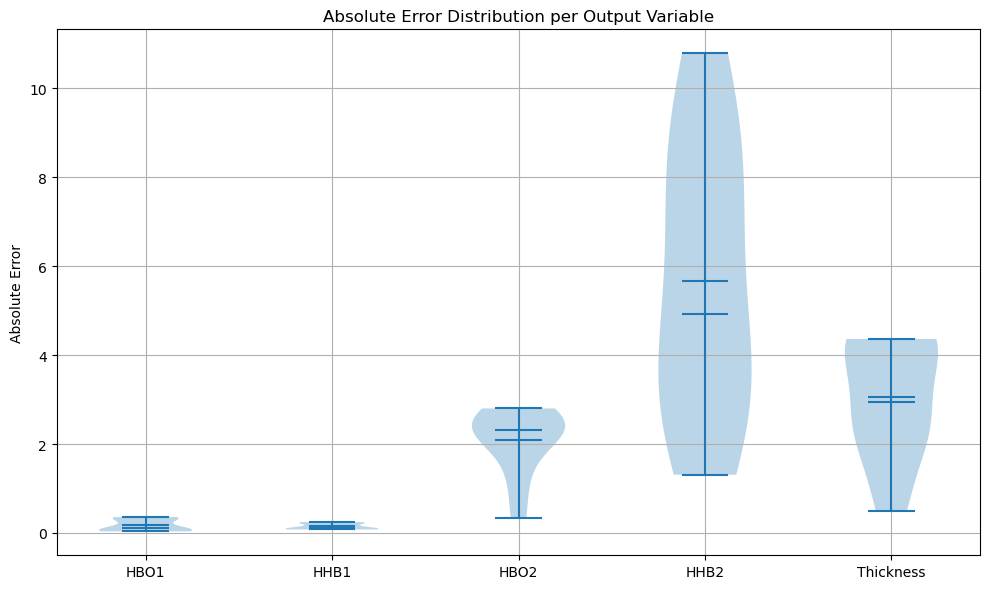

In [665]:
import matplotlib.pyplot as plt
import numpy as np

# Compute absolute errors
abs_errors = np.abs(all_preds - all_targets)  # shape: (10, 5)

# Labels for the 5 outputs
labels = ['HBO1', 'HHB1', 'HBO2', 'HHB2', 'Thickness']

# Transpose for violinplot input: list of arrays, each column is a list of errors
data = [abs_errors[:, i] for i in range(5)]

# Plot violin
fig, ax = plt.subplots(figsize=(10, 6))
parts = ax.violinplot(data, showmeans=True, showmedians=True)

# Set labels
ax.set_xticks(np.arange(1, 6))
ax.set_xticklabels(labels)
ax.set_ylabel('Absolute Error')
ax.set_title('Absolute Error Distribution per Output Variable')

plt.grid(True)
plt.tight_layout()
plt.show()


### XGBoost

In [83]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

models = []
for i in range(5):  # One model for each target
    model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=500, max_depth=8, learning_rate=0.05)
    model.fit(X_train, y_train[:, i])
    models.append(model)

In [84]:
y_preds = np.column_stack([model.predict(X_test) for model in models])
mse = np.mean((y_preds - y_test)**2, axis=0)

In [85]:
mse

array([ 0.        ,  0.        ,  4.87671233, 28.1110029 ,  0.1818179 ])

In [86]:
y_preds

array([[ 5.      ,  2.5     , 25.015816, 23.000256, 10.000355],
       [ 5.      ,  2.5     , 25.004585, 19.003727, 17.999956],
       [ 5.      ,  2.5     , 25.004585, 19.003727, 17.999956],
       [ 5.      ,  2.5     , 27.99773 , 23.000256, 10.000355],
       [ 5.      ,  2.5     , 25.007544, 15.024025, 16.000002],
       [ 5.      ,  2.5     , 25.004755, 18.987652, 14.000032],
       [ 5.      ,  2.5     , 27.99773 , 23.000256, 10.000355],
       [ 5.      ,  2.5     , 27.983437, 26.998829, 16.000002],
       [ 5.      ,  2.5     , 27.99773 , 26.999687, 10.000355],
       [ 5.      ,  2.5     , 25.04939 , 15.044064, 19.999796],
       [ 5.      ,  2.5     , 25.015783, 22.993965, 12.000086],
       [ 5.      ,  2.5     , 25.018646, 22.988577, 14.000032],
       [ 5.      ,  2.5     , 25.005764, 17.00168 , 10.000355],
       [ 5.      ,  2.5     , 25.019613, 22.973148, 16.000002],
       [ 5.      ,  2.5     , 25.015816, 23.000256, 10.000355],
       [ 5.      ,  2.5     , 25.004585,

In [87]:
y_test

array([[ 5. ,  2.5, 28. , 19. , 10. ],
       [ 5. ,  2.5, 25. , 17. , 18. ],
       [ 5. ,  2.5, 25. , 15. , 18. ],
       [ 5. ,  2.5, 28. , 21. , 10. ],
       [ 5. ,  2.5, 25. , 35. , 18. ],
       [ 5. ,  2.5, 28. , 15. , 14. ],
       [ 5. ,  2.5, 25. , 25. , 10. ],
       [ 5. ,  2.5, 25. , 29. , 16. ],
       [ 5. ,  2.5, 28. , 25. , 10. ],
       [ 5. ,  2.5, 25. , 17. , 20. ],
       [ 5. ,  2.5, 28. , 19. , 12. ],
       [ 5. ,  2.5, 28. , 19. , 14. ],
       [ 5. ,  2.5, 25. , 15. , 10. ],
       [ 5. ,  2.5, 28. , 19. , 16. ],
       [ 5. ,  2.5, 25. , 21. , 10. ],
       [ 5. ,  2.5, 28. , 15. , 18. ],
       [ 5. ,  2.5, 25. , 33. , 14. ],
       [ 5. ,  2.5, 28. , 17. , 10. ],
       [ 5. ,  2.5, 28. , 29. , 10. ],
       [ 5. ,  2.5, 25. , 29. , 10. ],
       [ 5. ,  2.5, 25. , 19. , 10. ],
       [ 5. ,  2.5, 25. , 27. , 10. ]])

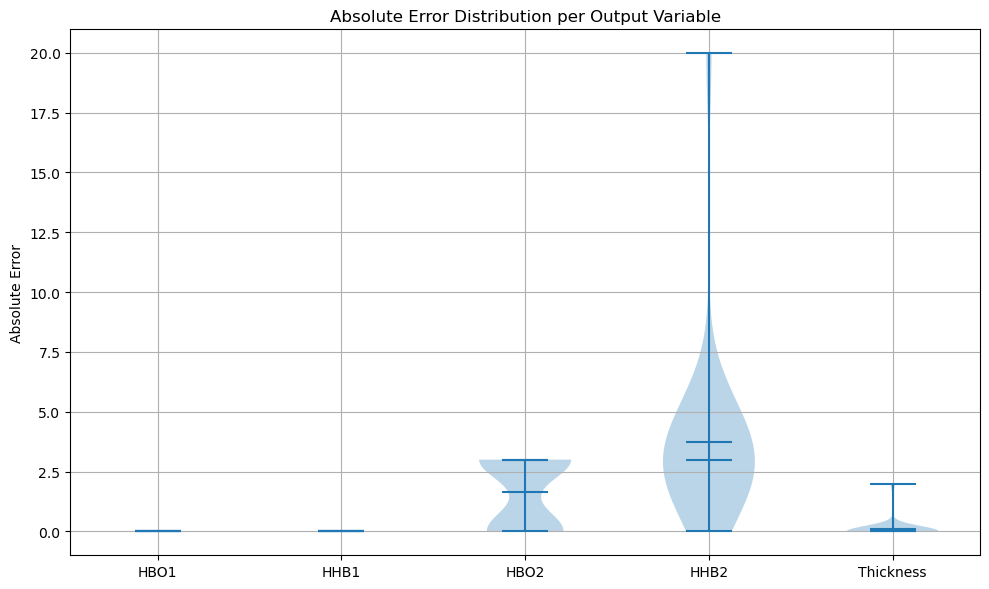

In [88]:
# Compute absolute errors
import matplotlib.pyplot as plt

abs_errors = np.abs(np.array(y_preds) - np.array(y_test))

# Labels for the 5 outputs
labels = ['HBO1', 'HHB1', 'HBO2', 'HHB2', 'Thickness']

# Transpose for violinplot input: list of arrays, each column is a list of errors
data = [abs_errors[:, i] for i in range(5)]

# Plot violin
fig, ax = plt.subplots(figsize=(10, 6))
parts = ax.violinplot(data, showmeans=True, showmedians=True)

# Set labels
ax.set_xticks(np.arange(1, 6))
ax.set_xticklabels(labels)
ax.set_ylabel('Absolute Error')
ax.set_title('Absolute Error Distribution per Output Variable')

plt.grid(True)
plt.tight_layout()
plt.show()